In [12]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteH6HHWJ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteH6HHWJ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteH6HHWJ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [9]:
model = tf.keras.models.Sequential([
                tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [11]:
history = model.fit(train_dataset, epochs = 10, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 138s 263ms/step - loss: 0.6014 - acc: 0.6487 - val_loss: 0.4552 - val_acc: 0.8078
Epoch 2/10
391/391 [==============================] - 104s 262ms/step - loss: 0.4197 - acc: 0.8193 - val_loss: 0.5870 - val_acc: 0.7236
Epoch 3/10
391/391 [==============================] - 104s 263ms/step - loss: 0.4940 - acc: 0.7742 - val_loss: 0.4942 - val_acc: 0.7498
Epoch 4/10
391/391 [==============================] - 104s 264ms/step - loss: 0.4084 - acc: 0.8227 - val_loss: 0.4208 - val_acc: 0.8164
Epoch 5/10
391/391 [==============================] - 105s 267ms/step - loss: 0.4650 - acc: 0.7884 - val_loss: 0.4382 - val_acc: 0.8039
Epoch 6/10
391/391 [==============================] - 105s 265ms/step - loss: 0.3322 - acc: 0.8636 - val_loss: 0.3779 - val_acc: 0.8488
Epoch 7/10
391/391 [==============================] - 105s 266ms/step - loss: 0.2334 - acc: 0.9142 - val_loss: 0.3467 - val_acc: 0.8539
Epoch 8/10
391/391 [============================

In [13]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_' + metric])
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_' + metric])
  plt.show()

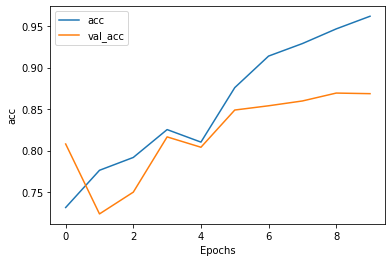

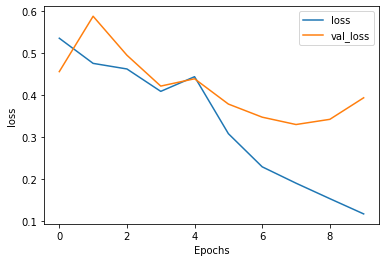

In [14]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')